### Modules used in this notebook
cartopy, xarray, xeofs, numpy



https://xeofs.readthedocs.io/en/latest/

https://xeofs.readthedocs.io/en/latest/auto_examples/index.html


In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import xeofs as xe
from eofs.examples import example_data_path

In [ ]:
# Read geopotential height data using the xarray module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
filename = example_data_path('hgt_djf.nc')
z_djf = xr.open_dataset(filename)['z']
z_djf

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:167: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.DataArray 'z' (time: 65, pressure: 1, latitude: 29, longitude: 49)>
[92365 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1948-01-15T12:00:00 ... 2012-01-15T12:00:00
  * pressure   (pressure) float32 500.0
  * latitude   (latitude) float32 20.0 22.5 25.0 27.5 ... 82.5 85.0 87.5 90.0
  * longitude  (longitude) float32 -80.0 -77.5 -75.0 -72.5 ... 35.0 37.5 40.0
Attributes:
    standard_name:  geopotential_height
    long_name:      DJF mean geopotential height

In [ ]:

# Compute anomalies by removing the time-mean.
z_djf = z_djf - z_djf.mean(dim='time')

In [ ]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
eof = xe.models.EOF(n_modes=10, standardize = False, use_coslat=True)

In [ ]:
# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof.fit(z_djf, dim="time")


In [ ]:
comps = eof.components()  # EOFs (spatial patterns)
comps

<xarray.DataArray 'components' (mode: 10, pressure: 1, latitude: 29,
                                longitude: 49)>
array([[[[-0.00469613, -0.00392751, -0.00301314, ..., -0.00455412,
          -0.00541736, -0.0061014 ],
         [-0.00783331, -0.00710821, -0.00619347, ..., -0.00185039,
          -0.00301786, -0.00390021],
         [-0.0119648 , -0.01133982, -0.01052566, ...,  0.00243545,
           0.001167  ,  0.00020305],
         ...,
         [ 0.00945986,  0.00956828,  0.00968678, ...,  0.01089302,
           0.01084589,  0.01079533],
         [ 0.00671332,  0.00674136,  0.00676818, ...,  0.0073578 ,
           0.00734776,  0.00734341],
         [-0.        , -0.        , -0.        , ..., -0.        ,
          -0.        , -0.        ]]],


       [[[-0.0114903 , -0.01185306, -0.01204229, ...,  0.00219043,
           0.00207651,  0.00174118],
         [-0.01371036, -0.01438028, -0.01488406, ...,  0.00334003,
           0.00330025,  0.00300748],
         [-0.01562735, -0.0166357 , -0.01749004, ...,  0.00306471,
...
           0.0127609 ,  0.01290267],
         [ 0.01759435,  0.01754046,  0.01744445, ...,  0.01137548,
           0.01134974,  0.01131711],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]]],


       [[[-0.00816659, -0.00764206, -0.00733912, ..., -0.01988666,
          -0.02073111, -0.02082689],
         [-0.01225773, -0.01157061, -0.01114436, ..., -0.02940624,
          -0.03176751, -0.03277784],
         [-0.01855334, -0.01806122, -0.01725408, ..., -0.03632748,
          -0.040721  , -0.04305193],
         ...,
         [ 0.00792773,  0.00806476,  0.00824448, ...,  0.03864792,
           0.03932919,  0.04001884],
         [ 0.01311835,  0.01316305,  0.01322511, ...,  0.02446616,
           0.02472456,  0.02498793],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]]]])
Coordinates:
  * pressure   (pressure) float32 500.0
  * latitude   (latitude) float32 20.0 22.5 25.0 27.5 ... 82.5 85.0 87.5 90.0
  * longitude  (longitude) float32 -80.0 -77.5 -75.0 -72.5 ... 35.0 37.5 40.0
  * mode       (mode) int64 1 2 3 4 5 6 7 8 9 10
Attributes: (12/16)
    model:          EOF analysis
    software:       xeofs
    version:        2.3.1
    date:           2024-03-16 18:40:58
    n_modes:        10
    center:         True
    ...             ...
    feature_name:   feature
    random_state:   None
    verbose:        False
    compute:        True
    solver:         auto
    solver_kwargs:  {}

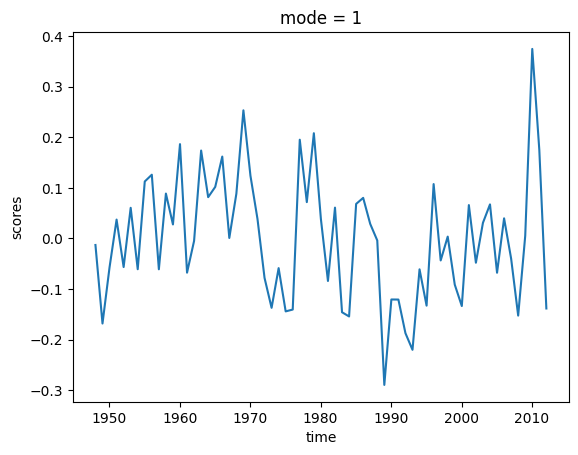

In [ ]:
# A vedere il pattern penso il segno sia invertito, inverno 2010 infatti era molto negativo il NAO
scores = eof.scores()  # PCs (temporal patterns)
scores.isel(mode = 0).plot()

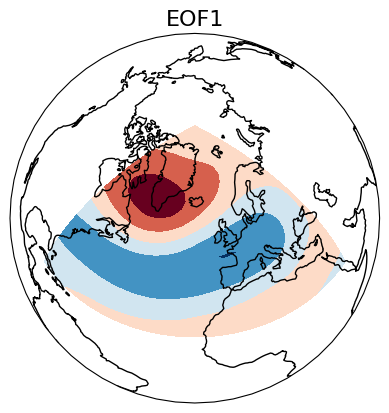

In [ ]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
comps.isel(mode = 0).squeeze().plot.contourf(ax=ax,
                                   cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1', fontsize=16)
plt.show()